## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/ObesityDataSet.csv")

In [3]:
data.shape

(2111, 17)

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [6]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
data.duplicated().sum()

24

In [9]:
data=data.drop_duplicates()

In [10]:
data.shape

(2087, 17)

In [11]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
num_columns=data.select_dtypes(include="number").columns

In [13]:
num_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [14]:
cat_columns=data.select_dtypes(include="object").columns
cat_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## CHECKING OUTLIERS

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

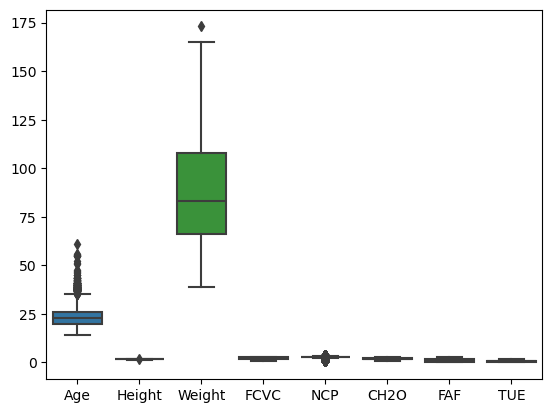

In [16]:
sns.boxplot(data)

In [17]:
# for i in num_columns.columns:
#     plt.title(i)
#     sns.boxplot(num_columns[i])
#     plt.show()

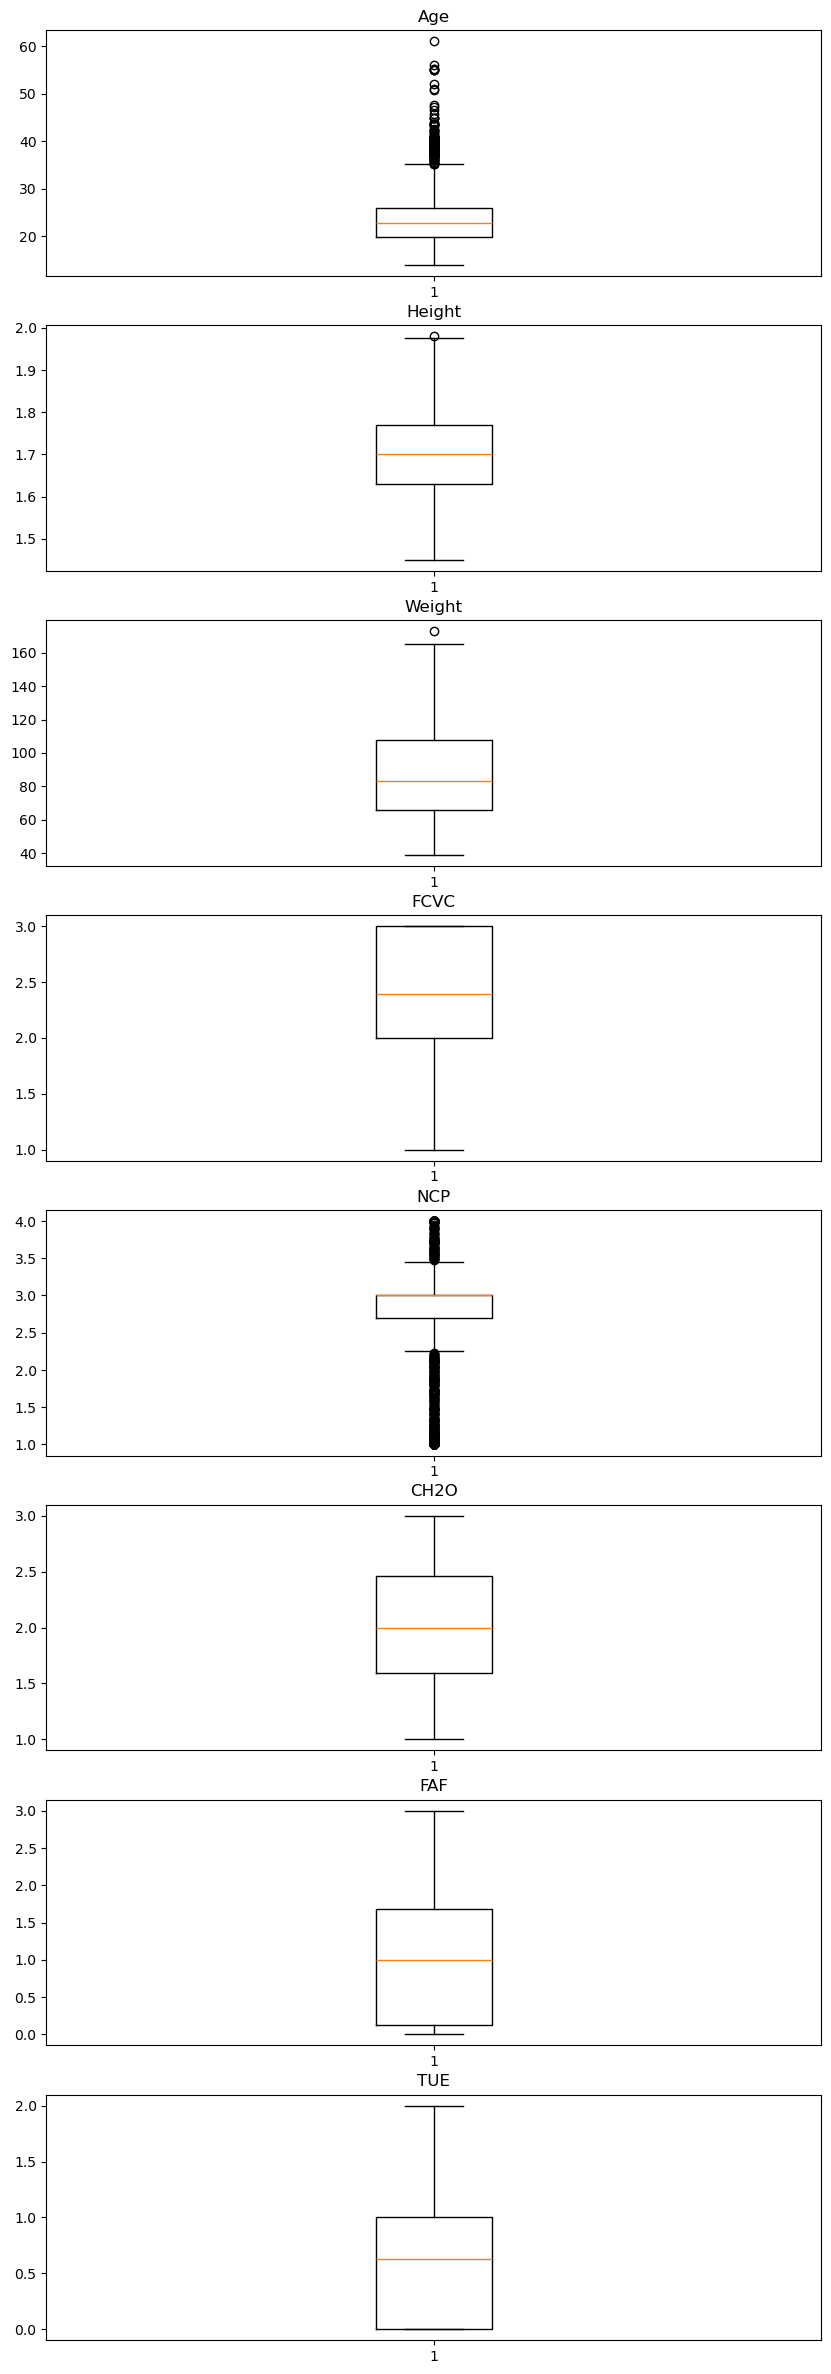

In [18]:
# boxplot for each numerical column.
num_col = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 30))
i=0

for col in num_col:
    ax = axes[i]
    ax.boxplot(data[col])
    ax.set_title(col)
    i += 1

## IQR METHOD

In [19]:
num_col = ['Age','Height', 'Weight', 'NCP']
for cols in num_col:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3-Q1
    m1 = Q1-1.5*IQR
    m2 = Q3+1.5*IQR
    data[cols] = data[cols].clip(lower=m1,upper=m2)

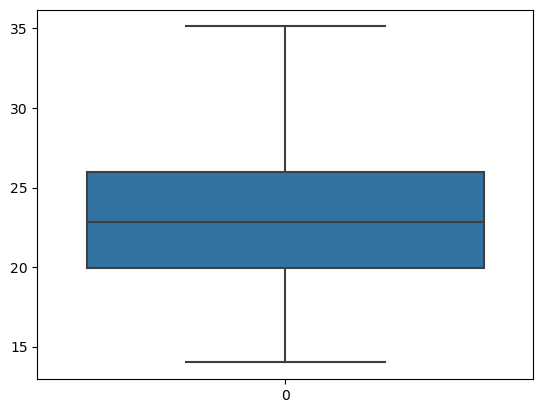

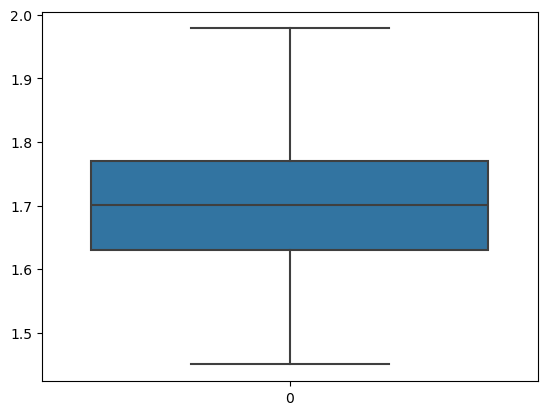

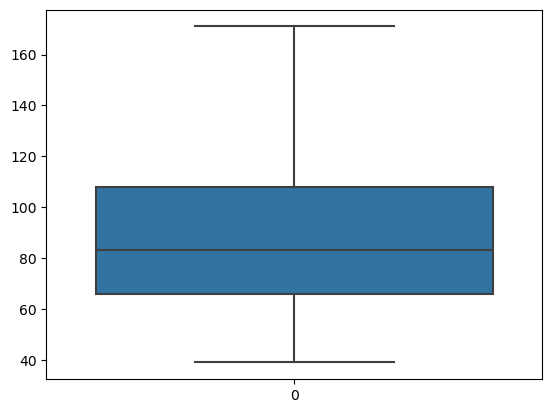

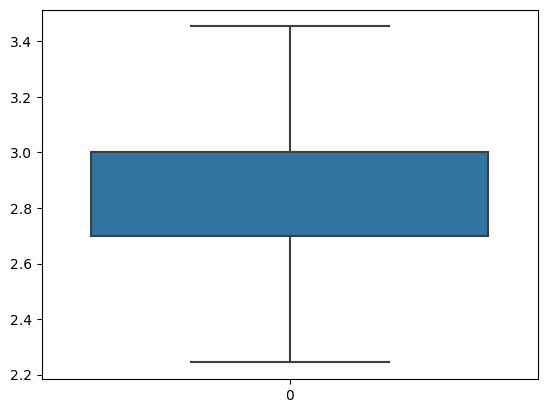

In [20]:
num_col = ['Age','Height', 'Weight', 'NCP']
for cols in num_col:
  sns.boxplot(data[cols])
  plt.show()

<Axes: >

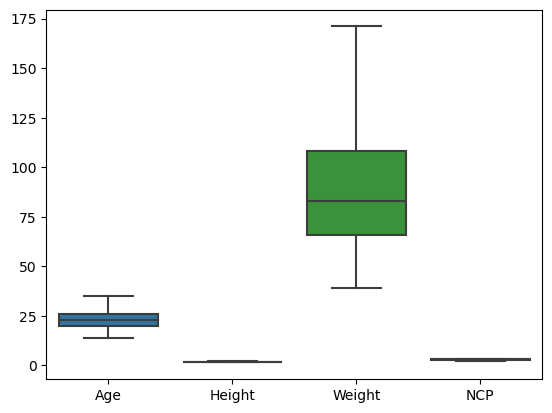

In [21]:
sns.boxplot(data=data[['Age','Height', 'Weight', 'NCP']])

## ENCODING

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
L_encoder = LabelEncoder()

In [24]:
for i in cat_columns:
    data[i] = L_encoder.fit_transform(data[i])

In [25]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.000000,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.000000,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.000000,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.000000,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,2.243667,2,0,2.0,0,0.0,0.0,2,3,6


In [26]:
y=data['NObeyesdad']
data=data.drop(['NObeyesdad'],axis=1)

## SCALING

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss=StandardScaler()

In [29]:
data=ss.fit_transform(data)

In [30]:
data=pd.DataFrame(data)

In [31]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.008179,-0.556483,-0.887421,-0.873051,0.460394,-2.754719,-0.788364,0.401080,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,0.554211,1.411836,0.506768
1,-1.008179,-0.556483,-1.960826,-1.178610,0.460394,-2.754719,1.082164,0.401080,0.318128,6.814090,1.636552,4.554073,2.328908,-1.090505,-0.522834,0.506768
2,0.991887,-0.179195,1.044709,-0.376517,0.460394,-2.754719,-0.788364,0.401080,0.318128,-0.146755,-0.007810,-0.219584,1.156947,0.554211,-2.457503,0.506768
3,0.991887,0.575380,1.044709,0.005432,-2.172052,-2.754719,1.082164,0.401080,0.318128,-0.146755,-0.007810,-0.219584,1.156947,-1.090505,-2.457503,1.297220
4,0.991887,-0.367839,0.830028,0.112377,-2.172052,-2.754719,-0.788364,-1.720013,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,-1.090505,-0.522834,0.506768


In [32]:
data.columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']

In [33]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.008179,-0.556483,-0.887421,-0.873051,0.460394,-2.754719,-0.788364,0.401080,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,0.554211,1.411836,0.506768
1,-1.008179,-0.556483,-1.960826,-1.178610,0.460394,-2.754719,1.082164,0.401080,0.318128,6.814090,1.636552,4.554073,2.328908,-1.090505,-0.522834,0.506768
2,0.991887,-0.179195,1.044709,-0.376517,0.460394,-2.754719,-0.788364,0.401080,0.318128,-0.146755,-0.007810,-0.219584,1.156947,0.554211,-2.457503,0.506768
3,0.991887,0.575380,1.044709,0.005432,-2.172052,-2.754719,1.082164,0.401080,0.318128,-0.146755,-0.007810,-0.219584,1.156947,-1.090505,-2.457503,1.297220
4,0.991887,-0.367839,0.830028,0.112377,-2.172052,-2.754719,-0.788364,-1.720013,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,-1.090505,-0.522834,0.506768


## TRAIN TEST SPLIT

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = data
y = y

In [36]:
Xtrain,xtest,Ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state= 1)

# MODEL BUILDING
## RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=1000,random_state=42)
RFC.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [38]:
y_test_pred = RFC.predict(xtest)

In [39]:
y_train_pred = RFC.predict(Xtrain)

In [40]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,y_test_pred)
acc

0.9585326953748007

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(Ytrain, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(Ytrain, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(Ytrain, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(Ytrain, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(Ytrain, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(Ytrain, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 1.0
Precision score : 1.0
recall score : 1.0
f1 score : 1.0
confusion matrix : [[182   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0]
 [  0   0 250   0   0   0   0]
 [  0   0   0 197   0   0   0]
 [  0   0   0   0 238   0   0]
 [  0   0   0   0   0 196   0]
 [  0   0   0   0   0   0 205]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       196
           6       1.00      1.00      1.00       205

    accuracy                           1.00      1460
   macro avg       1.00      1.00      1.00      1460
weighted avg       1.00      1.00      1.00      1460



## XGBOOST CLASSIFIER

In [42]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(maxdepth=5,learning_rate=1,n_estimators=1000)
xgb_clf.fit(Xtrain,Ytrain)

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "maxdepth" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
y_train_pred = xgb_clf.predict(Xtrain)

In [44]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,y_test_pred)
acc

0.9585326953748007

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(Ytrain, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(Ytrain, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(Ytrain, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(Ytrain, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(Ytrain, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(Ytrain, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 1.0
Precision score : 1.0
recall score : 1.0
f1 score : 1.0
confusion matrix : [[182   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0]
 [  0   0 250   0   0   0   0]
 [  0   0   0 197   0   0   0]
 [  0   0   0   0 238   0   0]
 [  0   0   0   0   0 196   0]
 [  0   0   0   0   0   0 205]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      1.00      1.00       192
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       197
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       196
           6       1.00      1.00      1.00       205

    accuracy                           1.00      1460
   macro avg       1.00      1.00      1.00      1460
weighted avg       1.00      1.00      1.00      1460



## SVC CLASSIFIER

In [46]:
from sklearn.svm import SVC
import numpy as np
svc_model = SVC(kernel='rbf',degree = 3, C=1.0, gamma='scale')
svc_model.fit(Xtrain,Ytrain)

SVC()

In [47]:
y_train_pred = svc_model.predict(Xtrain)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(Ytrain, y_train_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(Ytrain, y_train_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(Ytrain, y_train_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(Ytrain, y_train_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(Ytrain, y_train_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(Ytrain, y_train_pred)
print('classification report :', cls_rep)

Accuracy score : 0.9506849315068493
Precision score : 0.9513079728985439
recall score : 0.9506849315068493
f1 score : 0.9508242969294142
confusion matrix : [[178   4   0   0   0   0   0]
 [  4 173   0   0   0  13   2]
 [  0   2 245   1   0   1   1]
 [  0   1   1 195   0   0   0]
 [  0   1   0   0 237   0   0]
 [  0  13   1   0   0 176   6]
 [  0   4   6   0   0  11 184]]
classification report :               precision    recall  f1-score   support

           0       0.98      0.98      0.98       182
           1       0.87      0.90      0.89       192
           2       0.97      0.98      0.97       250
           3       0.99      0.99      0.99       197
           4       1.00      1.00      1.00       238
           5       0.88      0.90      0.89       196
           6       0.95      0.90      0.92       205

    accuracy                           0.95      1460
   macro avg       0.95      0.95      0.95      1460
weighted avg       0.95      0.95      0.95      1460



In [49]:
y_test_pred = svc_model.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
acc_score = accuracy_score(ytest, y_test_pred)
print('Accuracy score :', acc_score)
pre_score = precision_score(ytest, y_test_pred, average='weighted')
print('Precision score :', pre_score)
re_call = recall_score(ytest, y_test_pred, average='weighted')
print('recall score :' ,re_call)
f1_score = f1_score(ytest, y_test_pred, average='weighted')
print('f1 score :',f1_score )
con_mat = confusion_matrix(ytest, y_test_pred)
print('confusion matrix :', con_mat)
cls_rep = classification_report(ytest, y_test_pred)
print('classification report :', cls_rep)

Accuracy score : 0.8644338118022329
Precision score : 0.8687167953753083
recall score : 0.8644338118022329
f1 score : 0.8653265862783459
confusion matrix : [[77  8  0  0  0  0  0]
 [ 6 66  0  0  0 13  5]
 [ 0  4 89  3  0  2  3]
 [ 0  0  4 96  0  0  0]
 [ 0  0  1  0 85  0  0]
 [ 0 12  1  0  0 66  1]
 [ 0  4  8  0  0 10 63]]
classification report :               precision    recall  f1-score   support

           0       0.93      0.91      0.92        85
           1       0.70      0.73      0.72        90
           2       0.86      0.88      0.87       101
           3       0.97      0.96      0.96       100
           4       1.00      0.99      0.99        86
           5       0.73      0.82      0.77        80
           6       0.88      0.74      0.80        85

    accuracy                           0.86       627
   macro avg       0.87      0.86      0.86       627
weighted avg       0.87      0.86      0.87       627



## MLFLOW

In [51]:
import mlflow
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']="file:///Users/HP/OneDrive/Documents/Bhuvan/b"

In [52]:
mlflow.set_experiment("Obesity_Dataset")

<Experiment: artifact_location='file:///C:/Users/HP/OneDrive/Documents/Bhuvan/b/189403111297438159', creation_time=1721653543306, experiment_id='189403111297438159', last_update_time=1721653543306, lifecycle_stage='active', name='Obesity_Dataset', tags={}>

In [53]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import accuracy_score
    
    # model object initialization
    RandFor=RandomForestClassifier(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingClassifier(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(Xtrain,Ytrain)
    gbm=GBM.fit(Xtrain,Ytrain)
    
    #training scores
    training_score_rf=RandFor.score(Xtrain,Ytrain)
    training_score_gbm=GBM.score(Xtrain,Ytrain)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(xtest)
    y_pred_gbm=gbm.predict(xtest)
    
     #prediction evaluations
    testing_score_rf=accuracy_score(y_pred_rf,ytest)
    testing_score_gbm=accuracy_score(y_pred_gbm,ytest)
    
    #logging evaluation scores
    mlflow.log_metric("rf_training_score", testing_score_rf)
    mlflow.log_metric("gbm_training_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")


C:\Users\HP\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## DEPLOYMENT

In [55]:
import requests
import json
import pandas as pd


data = {'dataframe_records': pd.DataFrame(xtest).values.tolist()}
headers = {"content-Type" : "application/json"}

response = requests.post("http://localhost:1026/invocations",data=json.dumps(data),headers=headers)
predictions = response.json()

print(predictions)

{'predictions': [0, 2, 4, 0, 5, 0, 4, 2, 6, 1, 6, 3, 3, 5, 3, 0, 0, 0, 6, 1, 5, 4, 6, 6, 0, 1, 5, 4, 3, 4, 6, 2, 1, 2, 2, 0, 1, 6, 5, 2, 4, 0, 0, 0, 6, 1, 1, 2, 2, 2, 3, 5, 6, 6, 5, 6, 3, 2, 4, 4, 2, 5, 3, 0, 3, 6, 1, 5, 5, 0, 3, 0, 1, 3, 3, 5, 2, 6, 4, 1, 2, 0, 3, 1, 0, 3, 5, 2, 4, 3, 5, 2, 4, 6, 4, 0, 0, 3, 4, 2, 1, 2, 1, 5, 2, 6, 4, 2, 4, 0, 1, 0, 3, 1, 6, 2, 3, 0, 6, 5, 6, 5, 3, 1, 3, 3, 3, 6, 6, 3, 2, 0, 4, 4, 1, 4, 2, 4, 4, 6, 2, 1, 6, 6, 4, 2, 2, 3, 1, 1, 6, 0, 4, 1, 3, 6, 1, 0, 4, 5, 4, 4, 4, 6, 6, 3, 2, 5, 5, 2, 4, 2, 2, 3, 4, 1, 2, 3, 1, 3, 1, 2, 2, 4, 2, 1, 6, 1, 3, 1, 1, 6, 5, 0, 6, 6, 4, 6, 0, 4, 1, 4, 4, 0, 5, 3, 2, 3, 2, 2, 6, 3, 3, 0, 6, 1, 2, 6, 0, 3, 4, 4, 6, 2, 6, 2, 2, 0, 1, 3, 5, 1, 1, 5, 6, 2, 3, 5, 4, 4, 4, 4, 4, 4, 3, 5, 0, 1, 4, 1, 4, 5, 4, 3, 4, 1, 3, 5, 5, 6, 3, 4, 4, 1, 5, 1, 3, 3, 3, 3, 0, 0, 3, 5, 1, 5, 3, 5, 2, 6, 4, 5, 0, 0, 2, 6, 4, 5, 4, 6, 4, 0, 1, 2, 0, 6, 1, 0, 6, 1, 6, 1, 2, 0, 6, 6, 1, 5, 1, 1, 2, 4, 4, 3, 1, 3, 3, 4, 2, 5, 2, 3, 2, 6, 6, 2, 3, 4,